In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\playsheet_dataset.csv") # Reading the Data
data

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [3]:
data.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,7,8,9


In [4]:
Numerics=LabelEncoder()

In [5]:
data['outlook_n']=Numerics.fit_transform(data['Outlook'])
data['temp_n']=Numerics.fit_transform(data['Temp'])
data['humidity_n']=Numerics.fit_transform(data['Humidity'])
data['windy_n']=Numerics.fit_transform(data['Windy'])
data['play_n']=Numerics.fit_transform(data['Play'])

In [6]:
data

,Outlook,Temp,Humidity,Windy,Play,outlook_n,temp_n,humidity_n,windy_n,play_n
0,Rainy,Hot,High,f,no,1,1,0,0,0
1,Rainy,Hot,High,t,no,1,1,0,1,0
2,Overcast,Hot,High,f,yes,0,1,0,0,1
3,Sunny,Mild,High,f,yes,2,2,0,0,1
4,Sunny,Cool,Normal,f,yes,2,0,1,0,1
5,Sunny,Cool,Normal,t,no,2,0,1,1,0
6,Overcast,Cool,Normal,t,yes,0,0,1,1,1
7,Rainy,Mild,High,f,no,1,2,0,0,0
8,Rainy,Cool,Normal,f,yes,1,0,1,0,1
9,Sunny,Mild,Normal,f,yes,2,2,1,0,1


In [7]:
X = data.drop(columns = ['Outlook','Temp', 'Humidity', 'Windy','Play', 'play_n'])
y = data['play_n']


In [8]:
X

,outlook_n,temp_n,humidity_n,windy_n
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


C:\Users\Lenovo\.conda\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\.conda\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\.conda\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

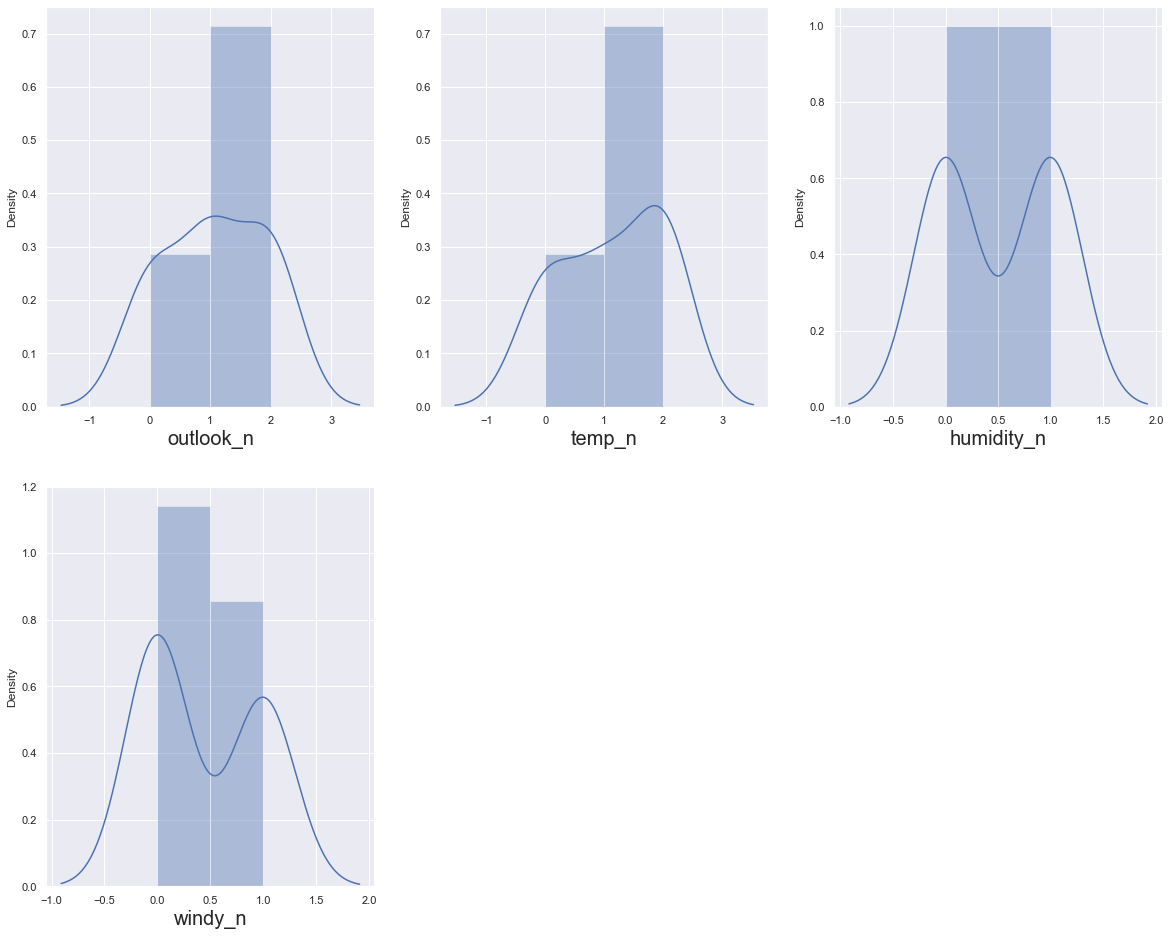

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
data.isnull().sum()

Outlook       0
Temp          0
Humidity      0
Windy         0
Play          0
outlook_n     0
temp_n        0
humidity_n    0
windy_n       0
play_n        0
dtype: int64

In [11]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [14]:
model.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [16]:
accuracy_score(y_test, y_pred)

0.5

In [17]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[0, 2],
       [0, 2]], dtype=int64)

In [18]:
true_negative = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_positive = conf_mat[1][1]

In [19]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.5

In [20]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5

In [21]:
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [22]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6666666666666666